# Let's import the Toolkit
Most of the stuff will be handled by it and will make our life easier

In [1]:
from Utils.Toolkit import TestGen, Tester
import time

### All we need to do it locate the data that we need

In [2]:
filePath = "./data/data_train.csv"
targetFile = "./data/alg_sample_submission.csv"

#### NB: The Toolkit for now work only for URM & CollabrativeFiltering Recommender Systems

## Create the dataset (URM_train, URM_test) that are going to be handled by the TestGen

In [3]:
testGen = TestGen(filePath, targetFile, train_perc=0.8)

### All we need to do to run a simple test is this

1. Define a Tester that takes:
    - **testGen** takes the testGen generated before
    - **kind** can be (for now):
        - **user_cf** 
        - **item_cf**

In [4]:
tester = Tester(testGen, kind="user_cf")

#### We can evaluate multiple TopK values

In [5]:
start = time.perf_counter()

tester.evaluateTopKs([5, 10, 12], def_shrink=500)

end = time.perf_counter()
topk_normal_seconds = round(end-start, 2)

user_cf -> MAP: 0.0376 with TopK = 5 & Shrink = 500	██████████-| 100.0% Complete
user_cf -> MAP: 0.0370 with TopK = 10 & Shrink = 500	█████████-| 100.0% Complete
user_cf -> MAP: 0.0370 with TopK = 12 & Shrink = 500	█████████-| 100.0% Complete


#### We can also evaluate multiple Shrink values

In [6]:
tester.evaluateShrink([100, 300, 400, 600], def_topK=7)

user_cf -> MAP: 0.0274 with TopK = 7 & Shrink = 100	██████████-| 100.0% Complete
user_cf -> MAP: 0.0358 with TopK = 7 & Shrink = 300	██████████-| 100.0% Complete
user_cf -> MAP: 0.0371 with TopK = 7 & Shrink = 400	██████████-| 100.0% Complete
user_cf -> MAP: 0.0378 with TopK = 7 & Shrink = 600	██████████-| 100.0% Complete


#### And of course we can evaluate with specific TopKs and Shrinks values

In [7]:
tester.evaluate(10, 600)

user_cf -> MAP: 0.0374 with TopK = 10 & Shrink = 600	█████████-| 100.0% Complete


### What if we want to plot our results? Easy
#### NB: You have to run at least once evaluateTopKs to be able to run plotTopK, same goes for plotShrink

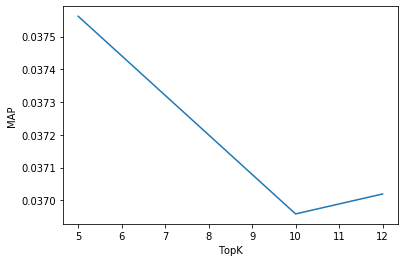

In [8]:
%matplotlib inline

tester.plotTopK()

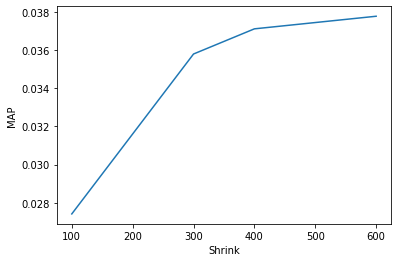

In [9]:
tester.plotShrink()

# Let's try with the ItemCF

item_cf -> MAP: 0.0404 with TopK = 5 & Shrink = 500	██████████-| 100.0% Complete
item_cf -> MAP: 0.0405 with TopK = 10 & Shrink = 500	█████████-| 100.0% Complete
item_cf -> MAP: 0.0404 with TopK = 12 & Shrink = 500	█████████-| 100.0% Complete
item_cf -> MAP: 0.0445 with TopK = 7 & Shrink = 100	██████████-| 100.0% Complete
item_cf -> MAP: 0.0419 with TopK = 7 & Shrink = 300	██████████-| 100.0% Complete
item_cf -> MAP: 0.0412 with TopK = 7 & Shrink = 400	██████████-| 100.0% Complete
item_cf -> MAP: 0.0404 with TopK = 7 & Shrink = 600	██████████-| 100.0% Complete
item_cf -> MAP: 0.0402 with TopK = 10 & Shrink = 600	█████████-| 100.0% Complete


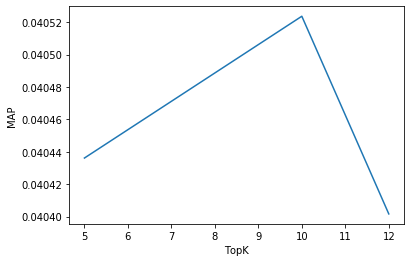

In [10]:
tester = Tester(testGen, kind="item_cf")
tester.evaluateTopKs([5, 10, 12], def_shrink=500)
tester.evaluateShrink([100, 300, 400, 600], def_topK=7)
tester.evaluate(10, 600)
tester.plotTopK()

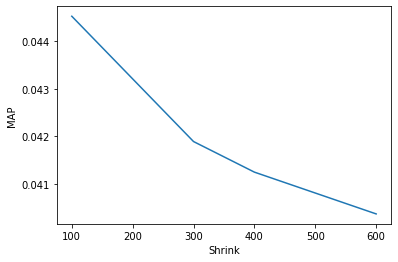

In [11]:
tester.plotShrink()

# Let's have some fun with multiprocessing :)

The method below will use multiprocessing to speedup the "bruteforce" of the best values.
Note that the number of processes opened will be **len(givenArray)** so in this case it will be 4 processes!
4 should be the maximum array length for a quad-core processor, 2 for a dual-core
More than that will not give any important speedup

#### NB: looks like notebooks can't handle multiprocessing

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



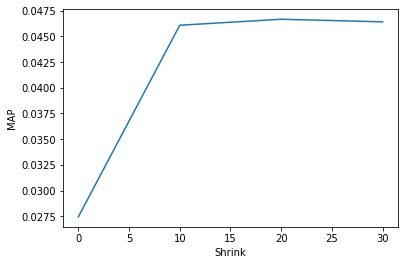

In [12]:
tester.evaluateShrink([0, 10, 20, 30], def_topK=20, boost=True)
tester.plotShrink()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



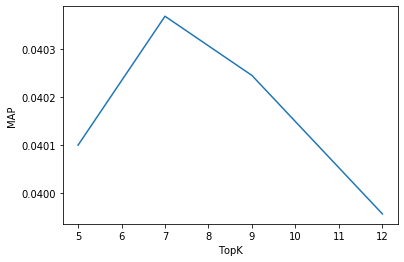

In [13]:
start = time.perf_counter()

tester.evaluateTopKs([5, 7, 9, 12], def_shrink=600, boost=True)

end = time.perf_counter()
topk_boost_seconds = round(end-start,2)

tester.plotTopK()

In [19]:
speedup = topk_normal_seconds/topk_boost_seconds
print(f'{round(speedup, 2)}x faster')

4.98x faster
